In [29]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score,r2_score, matthews_corrcoef, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

def result_model(model,X,Y, mat = True) :
    Y_model = model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
    if mat:
    # Matrice de confusion
        cm_model = confusion_matrix(Y, Y_model)
        plt.rcParams['figure.figsize'] = (5, 5)
        sns.heatmap(cm_model, annot = True)
        plt.title(str(model))
        plt.show()
    
    return(Y_model)

**Neuronal Network**

**Téléchargement des données**

In [30]:
import pandas as pd
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v2.csv")

**Pre-processing**

On sépare la variable à expliquer des variables explicatives

In [31]:
X = train.drop(columns = 'Response')
Y = train['Response']

On sépare les données en train et test puis on les scale avec les méthodes de sklearn.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index)

**Implémentation**

On applique ensuite directement notre modèle :

Le f1 score vaut 0.36884693189480783


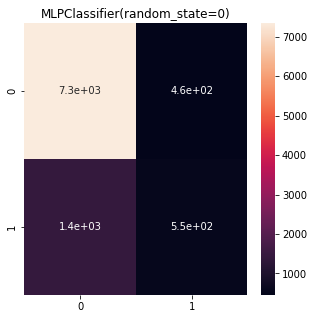

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=0).fit(X_scal_train, Y_train)
result_model(clf, X_scal_test, Y_test)

**Perception simple**

On sépare les données en train et test puis on les scale avec les méthodes de sklearn.

In [34]:
from sklearn.preprocessing import StandardScaler

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X2_scal_train = scaler.fit_transform(X2_train)
X2_scal_test = scaler.transform(X2_test) 

X2_scal_train = pd.DataFrame(X2_scal_train,index= X2_train.index)
X2_scal_test = pd.DataFrame(X2_scal_test,index= X2_test.index)


Nous importons les classes Sequential et Dense pour définir notre modèle et son architecture

In [35]:
from keras.models import Sequential
from keras.layers import Dense

La classe Sequential est une structure, initialement vide, qui permet de définir un empilement de couches de neurones

In [36]:
modelSimple = Sequential()

Nous ajoutons une couche qui relie directement : 
 

1.  la couche d'entrée, input_dim: nombre de neurones qui correspond au nombre de variables prédictives ;
2.   la couche de sortie, units=1:une seule sortie puisque la variables cible est binaire, codée 1/0 ;
3.    une fonction d'activation sigmoïde.

La fonction Dense permet de connecter tous les neurones de la couche précédente à tous les neurones de la couche suivante.

In [37]:
modelSimple.add(Dense(units=1,input_dim=3,activation="sigmoid",input_shape=(None,15)))

In [38]:
print(modelSimple.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, None, 1)           16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None


En entrée du neurone de la couche de sortie, nous avons la combinaison linéaire suivante : 
$$d(X)=a_0+a_1X_1+a_2X_2$$
Après application de la fonction d'activation sigmöïde.

Nous avons en sortie du neurone de la couche de sortie :
$$g(d)=\frac{1}{1+e^{-d}}$$
$g(d)$ est une estimation de la probabilité conditionnelle $P(Y=pos|X_1,X_2)$ qui est déterminante dans les problèmatiques de classement.

L'étape suivante consiste à spécifier les caractéristiques de l'algorithme d'apprentissage : la fonction de perte à optimiser est l'entropie croisée binaire, elle correspond à la log-vraisemblance d'un échantillon où la probabilité conditionnelle d'appartenance aux classes est modélisée à l'aide de la loi binomiale.

Le modèle est ajusté en utilisant la fonction binaire de perte d'entropie croisée et à travers l'utilisation de la version efficace d' Adam  (algorithme d'optimisation) de la descente de gradient stochastique.
La métrique utilisée pour mesurer la qualité de la modélisation est le taux de reconnaissance ou taux de succès.

In [41]:
modelSimple.compile(loss="binary_crossentropy",optimizer ="Adamax",metrics=["accuracy"])

Le modèle à 150 époques d'apprentissage est adapté à la taille de lot par défaut de 200 échantillons. L'évaluation des performances du modèle est effectué à la fin de chaque époque d'apprentissage sur l'ensemble de données de test.

In [43]:
#apprentisage
batch_size = 200    
nb_epoch = 1500
modelSimple.fit(X2_scal_train, Y2_train,epochs=nb_epoch,batch_size=batch_size, verbose = False)

In [45]:
import numpy as np
print(np.shape(X2_scal_train))
print(np.shape(X2_scal_test))
print(np.shape(Y2_train))
print(np.shape(Y2_test))

(55335, 15)
(9766, 15)
(55335,)
(9766,)


In [46]:
import numpy as np
Y2_model = modelSimple.predict(X2_scal_test)

Y2_model =Y2_model.reshape(-1)

Y2_model_classes = (Y2_model > 0.5).astype("int")


Métriques de précision de la classification et de la perte

In [47]:
test_loss, test_acc = modelSimple.evaluate(X2_scal_test, Y2_test)
print("perte: {}, accuracy: {}".format(test_loss, test_acc))


306/306 [==============================] - 1s 1ms/step - loss: 0.3537 - accuracy: 0.7985
perte: 0.3536636531352997, accuracy: 0.7984845638275146


Evaluation du F1-Score

In [48]:
f1_scor2 = f1_score(Y2_test,Y2_model_classes)
print('Le f1 score vaut',f1_scor2)

Le f1 score vaut 0.21279999999999996


**Perception multiple**

Nous passons maintenant à un perceptron multicouche. Nous créons toujours structure Sequential, dans lequel nous ajoutons successivement deux objets Dense; le premier faisant la jonction entre la couche d'entrée et la couche caché.

On sépare les données en train et test puis on les scale avec les méthodes de sklearn.

In [20]:
from sklearn.preprocessing import StandardScaler

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X3_scal_train = scaler.fit_transform(X3_train)
X3_scal_test = scaler.transform(X3_test) 

X3_scal_train = pd.DataFrame(X3_scal_train,index= X3_train.index)
X3_scal_test = pd.DataFrame(X3_scal_test,index= X3_test.index)

In [21]:
modelMc = Sequential()

Nous ajoutons trois couches

In [22]:
modelMc.add(Dense(units=6,input_dim=3,activation="sigmoid",input_shape=(None,15)))
modelMc.add(Dense(units=3,input_dim=3, activation="sigmoid",input_shape=(None,15)))
modelMc.add(Dense(units=1,input_dim=3,activation="sigmoid",input_shape=(None,15)))

In [23]:
print(modelMc.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, None, 6)           96        
                                                                 
 dense_2 (Dense)             (None, None, 3)           21        
                                                                 
 dense_3 (Dense)             (None, None, 1)           4         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
modelMc.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Le modèle à 150 époques d'apprentissage est adapté à la taille de lot par défaut de 200 échantillons. L'évaluation des performances du modèle est effectué à la fin de chaque époque d'apprentissage sur l'ensemble de données de test.

In [50]:
batch_size = 200
nb_epoch = 1500
modelSimple.fit(X3_scal_train, Y3_train,epochs=nb_epoch,batch_size=batch_size, verbose = False)

In [51]:
import numpy as np
Y3_model = modelSimple.predict(X3_scal_test)

Y3_model =Y3_model.reshape(-1)

Y3_model_classes = (Y3_model > 0.5).astype("int")

Métriques de précision de la classification et de la perte

In [52]:
test_loss, test_acc = modelSimple.evaluate(X3_scal_test, Y3_test)
print("perte: {}, accuracy: {}".format(test_loss, test_acc))

306/306 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.7931
perte: 0.3600795269012451, accuracy: 0.7930575609207153


Evaluation du F1-Score

In [53]:
f1_scor3 = f1_score(Y3_test,Y3_model_classes)
print('Le f1 score vaut',f1_scor3)

Le f1 score vaut 0.2253737064009199
